In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams["font.size"] = "15"
plt.rcParams["font.family"] = "Times New Roman"

\begin{equation}H\left|\psi\right>=E\left|\psi\right>  \end{equation}
for eigenvalue $\lambda_1=\omega-2J_2\cos k_x+\sqrt{|J+\tilde Je^{ik_y}|^2-\alpha^2\omega^2}$

In [3]:
def k_spectrum_positive(w,J,J2,kx,ky,Jt,alpha):
    
    return w - 2*J2*np.cos(kx) + np.sqrt((np.abs(J + Jt*np.exp(1j*ky)))**2-alpha**2*w**2)

def k_spectrum_negative(w,J,J2,kx,ky,Jt,alpha):
    
    return w - 2*J2*np.cos(kx) - np.sqrt((np.abs(J + Jt*np.exp(1j*ky)))**2-alpha**2*w**2)

In [4]:
w, J, J2, kx, ky, Jt, alpha = 0, 0.2, 0.1, np.linspace(-np.pi, np.pi, 100), np.linspace(-np.pi, np.pi, 100), 1, 0.2

In [5]:
plt.rcParams["figure.figsize"] = [10, 10]

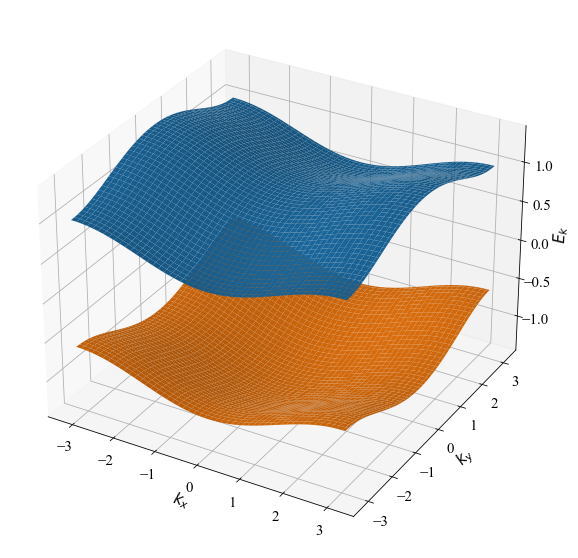

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
KX, KY = np.meshgrid(kx, ky)

# Express the mesh in the cartesian system.
Z1 = k_spectrum_positive(w, J, J2, KX, KY, Jt, alpha)

Z2 = k_spectrum_negative(w, J, J2, KX, KY, Jt, alpha)

# Plot the surface.
ax.plot_surface(KX, KY, Z1)
ax.plot_surface(KX, KY, Z2)

# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_zlabel(r'$E_k$')

plt.show()

# Effect of vertical coupling J2 on Energy 

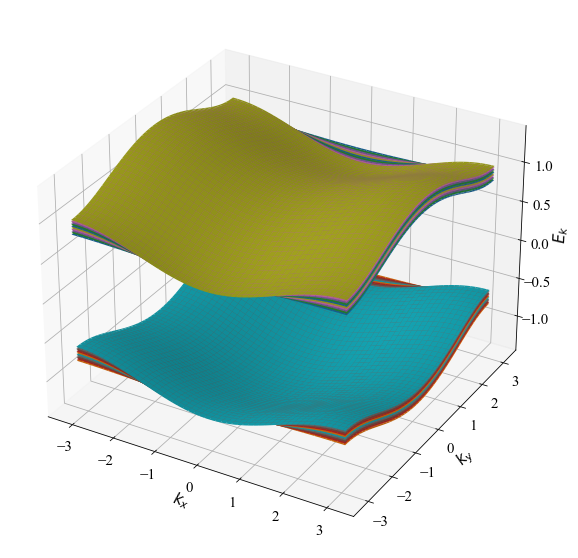

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
KX, KY = np.meshgrid(kx, ky)

# Express the mesh in the cartesian system.
Z1 = k_spectrum_positive(w, J, J2, KX, KY, Jt, alpha)

Z2 = k_spectrum_negative(w, J, J2, KX, KY, Jt, alpha)

# Plot the surface.
for i,J2 in enumerate(np.linspace(0.01,0.1,10)):
    Z1 = k_spectrum_positive(w, J, J2, KX, KY, Jt, alpha)
    Z2 = k_spectrum_negative(w, J, J2, KX, KY, Jt, alpha)
    ax.plot_surface(KX, KY, Z1)
    ax.plot_surface(KX, KY, Z2)
    
# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_zlabel(r'$E_k$')

plt.show()

# Effect of intercell coupling J on Energy 

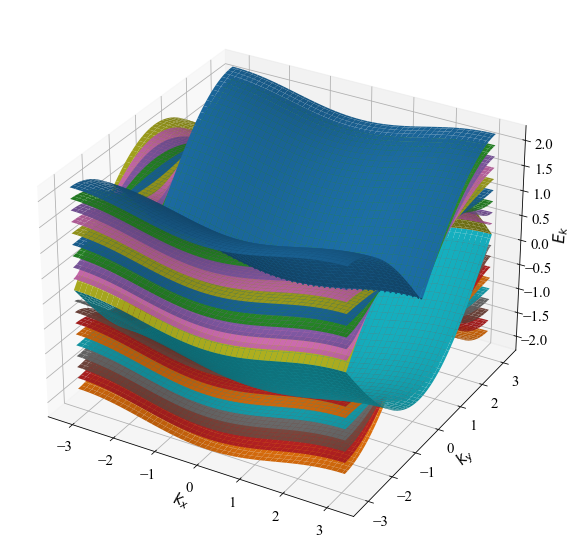

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
KX, KY = np.meshgrid(kx, ky)

# Express the mesh in the cartesian system.
Z1 = k_spectrum_positive(w, J, J2, KX, KY, Jt, alpha)

Z2 = k_spectrum_negative(w, J, J2, KX, KY, Jt, alpha)

# Plot the surface.
for i,J in enumerate(np.linspace(-1,1,10)):
    Z1 = k_spectrum_positive(w, J, J2, KX, KY, Jt, alpha)
    Z2 = k_spectrum_negative(w, J, J2, KX, KY, Jt, alpha)
    ax.plot_surface(KX, KY, Z1)
    ax.plot_surface(KX, KY, Z2)
    
# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_zlabel(r'$E_k$')

plt.show()

In [9]:
Z1.shape

(100, 100)

In [10]:
ZZ1 = np.zeros((10,100,100))
ZZ2 = np.zeros((10,100,100))

for i,J in enumerate(np.linspace(-1,1,10)):
    ZZ1[i] = k_spectrum_positive(w, J, J2, KX, KY, Jt, alpha)
    ZZ2[i] = k_spectrum_negative(w, J, J2, KX, KY, Jt, alpha)



In [ ]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# init the figure
# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def update(i):
    # clear the axis each frame
    ax.clear()

    # replot things
    ax.plot_surface(KX, KY, ZZ1[i])
    ax.plot_surface(KX, KY, ZZ2[i])
    

anim = FuncAnimation(fig, update, frames=10, interval=400)

anim.save('2dSSh_k_space.mp4', writer = 'ffmpeg', fps = 2)

HTML(anim.to_html5_video())



# Effect of vertical coupling J2 on Energy With respect to $k_x$ only

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

w, J, J2, kx, ky, Jt, alpha = 0, 0.2, 0.1, np.linspace(-np.pi, np.pi, 100), 0, 1, 0.2

# Express the mesh in the cartesian system.
Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)

Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)



# Plot the surface.
for i,J2 in enumerate(np.linspace(0.01,0.1,10)):
    Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)
    Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)

    ax.plot(kx,Z1)
    ax.plot(kx,Z2)


# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$E$')

plt.show()

#  Effect of intercell coupling J on Energy With respect to $k_x$ only

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

w, J, J2, kx, ky, Jt, alpha = 0, 0.2, 0.1, np.linspace(-np.pi, np.pi, 100), 0, 1, 0.2

# Express the mesh in the cartesian system.
Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)

Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)



# Plot the surface.
for i,J in enumerate(np.linspace(-1,1,10)):
    Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)
    Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)

    ax.plot(kx,Z1)
    ax.plot(kx,Z2)


# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$E$')

plt.show()

#  Effect of vertical coupling J2 on Energy With respect to $k_y$ only

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

w, J, J2, kx, ky, Jt, alpha = 0, 0.2, 0.1, 0, np.linspace(-np.pi, np.pi, 100), 1, 0.2

# Express the mesh in the cartesian system.
Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)

Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)



# Plot the surface.
for i,J2 in enumerate(np.linspace(0.01,0.1,10)):
    Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)
    Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)

    ax.plot(ky,Z1)
    ax.plot(ky,Z2)


# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$E$')

plt.show()

#  Effect of intercell coupling J on Energy With respect to $k_y$ only

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

w, J, J2, kx, ky, Jt, alpha = 0, 0.2, 0.1, 0, np.linspace(-np.pi, np.pi, 100), 1, 0.2

# Express the mesh in the cartesian system.
Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)

Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)



# Plot the surface.
for i,J in enumerate(np.linspace(-1,1,10)):
    Z1 = k_spectrum_positive(w, J, J2, kx, ky, Jt, alpha)
    Z2 = k_spectrum_negative(w, J, J2, kx, ky, Jt, alpha)

    ax.plot(ky,Z1)
    ax.plot(ky,Z2)


# Tweak the limits and add latex math labels.
ax.set_xlabel(r'$k_y$')
ax.set_ylabel(r'$E$')

plt.show()